## EEE586/494:  Python Exercise 1 

Simply read through the text, understand the concept and run the corresponding cells. 

*(Best if you type in a newly inserted cell. Typing the code helps you learn better, as you  inadvertently  make mistakes in typing and appreciate the correct format/syntax, if exists. )*

Feel free to write your remarks/ give answer to random questions asked - as much as possible - in the Markdown mode and preferably in a different font color, so that I can quickly glance at your work and remarks and feel reassured that you have indeed gone through the whole exercise genuinely, rather than simply running the cells. 
-  - - - -  -

In Python, there is no direct way to make a matrix.  We can make a list of lists. 

In [49]:
A = [ 
      [0 , 1, 3],
      [4, 5,  6], 
       [7,8,9]
    ]

In [50]:
display(A)

[[0, 1, 3], [4, 5, 6], [7, 8, 9]]

#####   <font color='green'>The datatype is a list</font>

In [51]:
type(A)

list

However, if we use the numpy library and convert the list of list above to a numpy array, then that array is treated like a matrix. That means we can perform matrix operations such as transpose, addition, squaring etc to that array. 

In [52]:
import numpy as np

In [53]:
A_matrix = np.array(A)

In [54]:
display(A_matrix)

array([[0, 1, 3],
       [4, 5, 6],
       [7, 8, 9]])

#####  <font color='green'>The datatype is now a numpy array short for ndarray</font>

In [55]:
type(A_matrix)

numpy.ndarray

In [8]:
display(A)

[[0, 1, 3], [4, 5, 6], [7, 8, 9]]

In [56]:
print('transpose= ', A_matrix.transpose())
print('check original A_matrix is ok:',  A_matrix)
print('add with itself:',  A_matrix+A_matrix)
print('square A_matrix:',  A_matrix**2)
print('get same value as squaring by multiplying original with itself:',  A_matrix*A_matrix)

transpose=  [[0 4 7]
 [1 5 8]
 [3 6 9]]
check original A_matrix is ok: [[0 1 3]
 [4 5 6]
 [7 8 9]]
add with itself: [[ 0  2  6]
 [ 8 10 12]
 [14 16 18]]
square A_matrix: [[ 0  1  9]
 [16 25 36]
 [49 64 81]]
get same value as squaring by multiplying original with itself: [[ 0  1  9]
 [16 25 36]
 [49 64 81]]


Calculator people:  Be careful about ^ vs ** 

### Graph Theory: Matrices

Let's make a proper adjacency matrix. 

5 nodes: 1,2,3,4,5

7 edges: (1->2), (1->4),  (2->3), (3->1), (4->5), (5->2), (5->4)

TASK 1: Please draw the graph based on the information above on your notebook, make an image and upload it in an inserted cell below. 

![alt text](Graph.jpg "Title")

TASK 2:  Now, based on your TASK 1 graph - write down the adjacency matrix, degree matrix and Laplacian matrix of the graph.  Take a photo/screenshot of your work and upload it here, nicely formatted.  

![alt text](Matrice.jpg "Title")

Now that you have an idea of what graph you are dealing with, let us try to generate all these important matrices in Python. 

Let's make the adjacency matrix first. 

In [57]:
G1_list = [ [0,0,1,0,0],
            [1, 0,0,0, 1],
            [0,1,0,0,0],
             [1,0,0,0,1],
            [0,0,0,1,0]]

In [58]:
G1 =  np.array(G1_list)
print("Adjacency Matrix of graph G1:")
print(G1)

Adjacency Matrix of graph G1:
[[0 0 1 0 0]
 [1 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 1]
 [0 0 0 1 0]]


That takes care of the adjacency matrix.  Now to find the degree matrix, we need to first find the row sums. 

In [59]:
rowSumG1 = np.sum(G1,axis=1)
print(rowSumG1)

[1 2 1 2 1]


This rowSumG1 is a vector ( you can do various applicable matrix operations on it).  

We need to find the degree matrix though - and for that we need a square matrix with the degrees of nodes across the diagonal.

In [13]:
D = np.diag(rowSumG1)
print(D)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]


Finally, to find the Laplacian matrix of the graph, we can just do the following: 

In [14]:
L =D-G1
print(L)

[[ 1  0 -1  0  0]
 [-1  2  0  0 -1]
 [ 0 -1  1  0  0]
 [-1  0  0  2 -1]
 [ 0  0  0 -1  1]]


### Visualization

What if I want to visualize this graph G1? 

Let us use another cool library!    `NetworkX`

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

G1
plt.show()


In [61]:
G1_network = nx.from_numpy_matrix(G1) 
# Converts a numpy matrix to a 'graph' in NetworkX
print(G1_network)

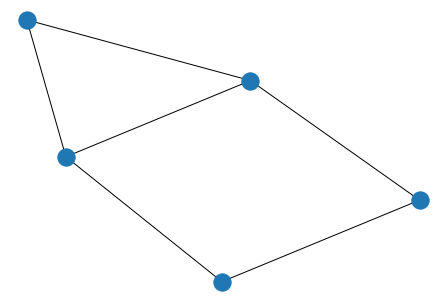

In [17]:
nx.draw(G1_network)
plt.show()

We got our give five nodes, alright!  Although we didn't get our seven edges as, clearly, the graph is being shown as an undirected graph.  Hence the two edges between node 4 and 5 are shown 

But how do we really know which ones are node 4 and 5? 

Let us modify the code such that the node numbers (node labels) are visible. 

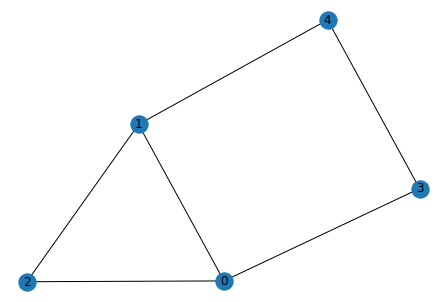

In [18]:
nx.draw(G1_network, with_labels = True)
plt.show()

The nodes start from 0, rather than 1.  Can we make it go from 1 to 5?

In [19]:
newLabels = {0:1, 1:2, 2:3, 3:4, 4:5}
#Create a dictionary with old labels as keys and new labels as values
print(newLabels)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}


In [20]:
# We could automate this a bit
newLabels1 = {i : i + 1 for i in G1_network.nodes()}
print(newLabels1) 

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}


IndexError: too many indices for array

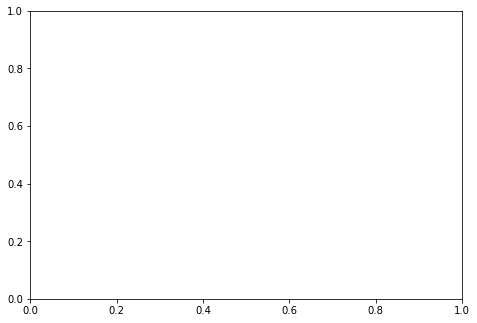

In [21]:
#What is happening here?
nx.draw(G1_network,newLabels1)
plt.show()

###### <font color='green'> nx.draw takes numpy array of adjacency matrix and layout as arguments, not labels as our 2nd argument is giving in dictionary values as input for changing labels in nodes its giving errors</font>

In [ ]:
nx.draw?  # What is this for? 

###### <font color='green'>nx.draw is used to draw a graph without any labels on nodes or edges</font>

In [ ]:
nx.draw_networkx_labels?

###### <font color='green'>nx.draw_networkx_labels, can be used to to change node labels it also takes in an input for the layout option for the graph, after using nx.draw function to draw the graph</font>

TypeError: cannot unpack non-iterable int object

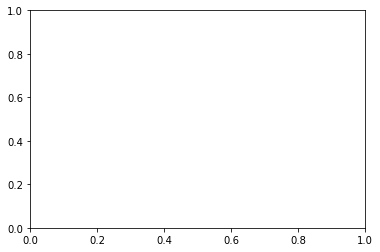

In [22]:
nx.draw_networkx_labels(G1_network,newLabels)
plt.show()

{0: array([1.00000000e+00, 2.38418583e-08]), 1: array([0.30901696, 0.95105658]), 2: array([-0.80901709,  0.58778522]), 3: array([-0.80901698, -0.58778535]), 4: array([ 0.30901711, -0.95105647])}


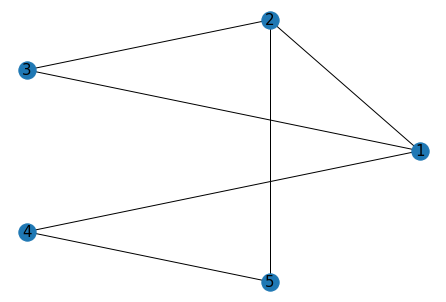

In [23]:
nodePositions = nx.circular_layout(G1_network)
print(nodePositions)
nx.draw_circular(G1_network)
nx.draw_networkx_labels(G1_network,nodePositions, newLabels, font_size=15)
plt.show()

#### <font color='green'>Spectral Layout for Undirected Graph</font>

{0: array([-0.30901699,  0.58778525]), 1: array([-0.30901699, -0.58778525]), 2: array([-1.00000000e+00,  8.61130381e-16]), 3: array([0.80901699, 0.95105652]), 4: array([ 0.80901699, -0.95105652])}


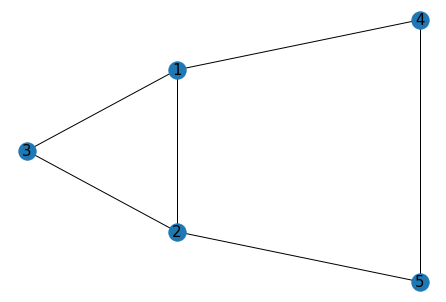

In [24]:
nodePositions1 = nx.spectral_layout(G1_network)
print(nodePositions1)
nx.draw_spectral(G1_network)
nx.draw_networkx_labels(G1_network,nodePositions1, newLabels, font_size=15)
plt.show()

Try for spectral layout

Any, we see all the graphs above are undirected. Anyway to make this directed?

Well, we first import the numpy array adjacency matrix, we need to tell networkx that we are importing a directed graph. 

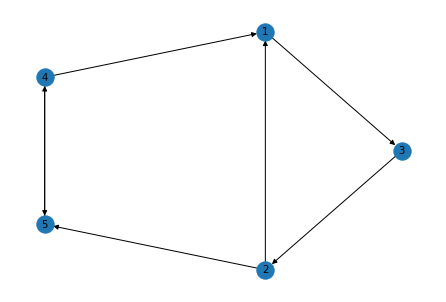

In [25]:
G1d = nx.from_numpy_matrix(G1, create_using=nx.MultiDiGraph())
positions = nx.spectral_layout(G1d)
nx.draw_spectral(G1d)
newLabels2= {i : i + 1 for i in G1d.nodes()}
nx.draw_networkx_labels(G1d, positions, newLabels2, font_size=10)
plt.show()

If you consider the bolder part of the arrow symbols to be the head of the arrow, then the diagram above shows the opposite direction for all edges (the edges are facing the direction opposite to what we want them to be). How can we fix this? 

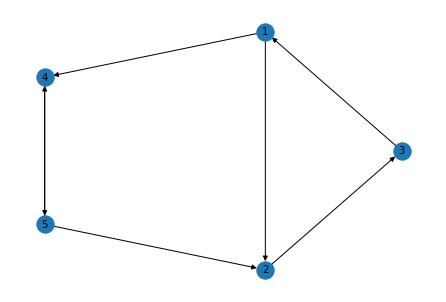

In [26]:
G1d = nx.from_numpy_matrix(G1.transpose(), create_using=nx.MultiDiGraph())
positions = nx.spectral_layout(G1d)
nx.draw_spectral(G1d)
newLabels2= {i : i + 1 for i in G1d.nodes()}
nx.draw_networkx_labels(G1d, positions, newLabels2, font_size=10)
plt.show()

In [62]:
print(nx.info(G1d))

Name: 
Type: MultiDiGraph
Number of nodes: 5
Number of edges: 7
Average in degree:   1.4000
Average out degree:   1.4000


### NetworkX Graphs
Technically, we could create the graphs themselves from NetworkX to begin with. 

In [27]:
C1 = nx.complete_graph(7)

We are creating a complete graph with seven nodes. How many edges are we expecting? 

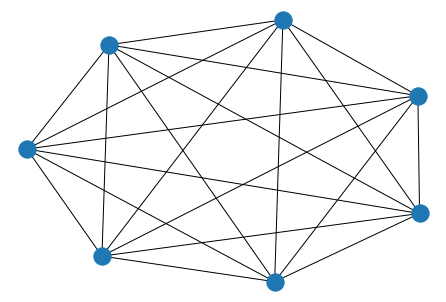

In [28]:
nx.draw(C1)
plt.show()

The position of the nodes can be arranged in different ways .

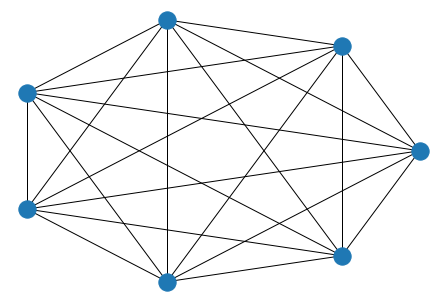

In [29]:
nx.draw_circular(C1)
plt.show()

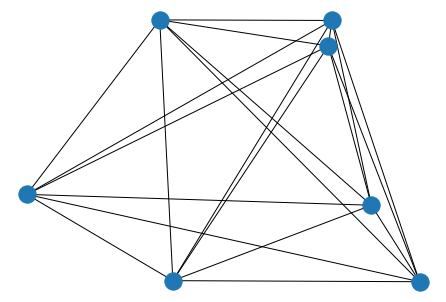

In [30]:
nx.draw_random(C1)
plt.show()

In [31]:
#Let's get the adjancency matrix

A2 = nx.to_numpy_matrix(C1)


What is it supposed to look  like?  Print it!

In [32]:
print(A2)

[[0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 0.]]


In [33]:
print(nx.info(C1))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 21
Average degree:   6.0000


In [34]:
print(nx.info(G1_network))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


Let's find the degree for each node of a graph. 

In [35]:
sorted(d for n, d in G1_network.degree())

[2, 2, 2, 3, 3]

For more: 
Go to the NetworkX tutorial - 

https://networkx.org/documentation/stable/tutorial.html

TASK 3: Compute the diameters of the G1_network and C1. Feel free to write down your observations. 

###### <font color='green'>Diameter is the largest path between any two nodes in the graph</font>  

###### Code from https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html

In [37]:
G1_network_diameter = nx.diameter(G1_network) 
print(G1_network_diameter)

2


In [38]:
C1_diamter = nx.diameter(C1)
print(C1_diamter)

1


######  <font color='green'> Diameter is smaller for C1 as it is a complete graph, it takes only one step to reach any node</font>  

TASK 4: Plot the degree distributions of G1_network and C1.  

######  Code for Degree Distribution 
https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html

In [39]:
from collections import Counter #used for counting
import seaborn as sns # seaborn is just visualization tool built on top of matplotlib
degree_sequence = sorted([d for n, d in G1_network.degree()])  # degree sequence
degreeCount = Counter(degree_sequence) #used  to count number of times each item(degrees) occurs in the list

In [40]:
degreeCount #we can see degree value of 2 is counted 3 times and degree value of 3 is counted 2 times

Counter({2: 3, 3: 2})

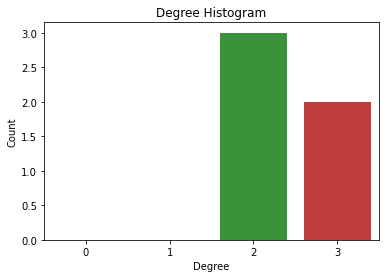

In [41]:
sns.barplot(x =[0,1,2,3], y =[0,0,3,2]) # since we know the count of each degrees we are passing in those values in x and y
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [42]:
sorted(d for n, d in C1.degree()) # just checking to see degree value for each node

[6, 6, 6, 6, 6, 6, 6]

In [43]:
degseq= sorted(d for n, d in C1.degree()) #degree for each node in the graph stored in degseq variable
degreeCounts = Counter(degseq) #used  to count number of times each item(degrees) occurs
degreeCounts #we can see only degree value 6 is counted 7 times no other degree value is found.

Counter({6: 7})

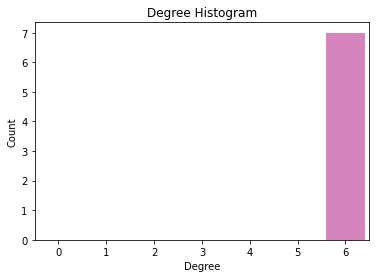

In [44]:
sns.barplot(x =[0,1,2,3,4,5,6], y =[0,0,0,0,0,0,7]) # passing in the appropriate values in x ,y
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

TASK 5: Discuss the clustering concepts for each graph. 

######  <font color='green'> Lets find the average clustering coefficient for both graphs
Clustering coeff tells us how each node's neighbors are connected. Higher the value more they tend to cluster.
    
Average clustering coefficient is the mean of the overall graph</font>

###### Code to find average clustering coefficient 
https://networkx.org/documentation/networkx-2.4/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html

In [45]:
nx.average_clustering(C1)

1.0

In [46]:
nx.average_clustering(G1_network)

0.3333333333333333

######  <font color='green'> C1: Has an average clustering coefficient of 1, which means that each nodes and its neighbors are all connected, this makes sense as its a complete graph.   G1_network: Has a lower clustering coefficient 0.33, as it tends to form less clusters</font>

TASK 6: Discuss about the path length concepts for each of the two graph. 

######  <font color='green'> Path length is the shortest distance between a pair of nodes, to calculate average path length we find the shortest distance between every pair of nodes and divide it by the number of items we found in all combinations </font> 

######  Code to find average shortest path length
https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html#:~:text=The%20average%20shortest%20path%20length%20is%20the%20sum%20of%20path,number%20of%20nodes%20in%20G.&text=If%20True%20use%20edge%20weights%20on%20path.

In [47]:
print(nx.average_shortest_path_length(G1_network))

1.4


In [48]:
print(nx.average_shortest_path_length(C1))

1.0


###### <font color='green'> Average path length is bigger in G1_network compared to C1 network and this makes sense as C1 network is a complete graph, length between any pair of nodes is shorter</font> 